In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, callbacks, optimizers, regularizers
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os



In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# 3. Atur path ke folder dataset di Shared Drive (GANTI PATH SESUAI STRUKTUR DRIVE)



base_dir = '/content/drive/MyDrive/FishImgDataset'

train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'val')
test_dir  = os.path.join(base_dir, 'test')

print("Isi folder:")
print(os.listdir(base_dir))

print("Isi folder TRAIN:")
print(os.listdir(os.path.join(base_dir, 'train')))

print("Isi folder VAL:")
print(os.listdir(os.path.join(base_dir, 'val')))

print("Isi folder TEST:")
print(os.listdir(os.path.join(base_dir, 'test')))

Isi folder:
['train', 'val', 'test']
Isi folder TRAIN:
['Silver Perch', 'Scat Fish', 'Tenpounder', 'Pangasius', 'Snakehead', 'Silver Carp', 'Tilapia', 'Silver Barb', 'Perch', 'Indo-Pacific Tarpon', 'Knifefish', 'Mosquito Fish', 'Jaguar Gapote', 'Indian Carp', 'Green Spotted Puffer', 'Long-Snouted Pipefish', 'Mudfish', 'Mullet', 'Janitor Fish', 'Black Spotted Barb', 'Gold Fish', 'Glass Perchlet', 'Freshwater Eel', 'Catfish', 'Grass Carp', 'Goby', 'Fourfinger Threadfin', 'Gourami', 'Climbing Perch', 'Bangus', 'Big Head Carp']
Isi folder VAL:
['Tilapia', 'Snakehead', 'Tenpounder', 'Silver Carp', 'Pangasius', 'Silver Barb', 'Perch', 'Mullet', 'Silver Perch', 'Scat Fish', 'Long-Snouted Pipefish', 'Indo-Pacific Tarpon', 'Mudfish', 'Knifefish', 'Grass Carp', 'Janitor Fish', 'Indian Carp', 'Jaguar Gapote', 'Green Spotted Puffer', 'Mosquito Fish', 'Gold Fish', 'Black Spotted Barb', 'Gourami', 'Freshwater Eel', 'Fourfinger Threadfin', 'Goby', 'Big Head Carp', 'Glass Perchlet', 'Climbing Perch', 

In [ ]:
image_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(train_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')
val_data = datagen.flow_from_directory(val_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')
test_data = datagen.flow_from_directory(test_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 8801 images belonging to 31 classes.
Found 2751 images belonging to 31 classes.
Found 1760 images belonging to 31 classes.


Found 8801 images belonging to 31 classes.
Found 2751 images belonging to 31 classes.
Found 1760 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 3477s 13s/step - accuracy: 0.1388 - loss: 3.5202 - val_accuracy: 0.2087 - val_loss: 2.9807 - learning_rate: 0.0010
Epoch 2/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 364s 1s/step - accuracy: 0.2165 - loss: 3.0075 - val_accuracy: 0.2963 - val_loss: 2.6558 - learning_rate: 9.5000e-04
Epoch 3/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 404s 1s/step - accuracy: 0.2653 - loss: 2.7774 - val_accuracy: 0.3573 - val_loss: 2.4181 - learning_rate: 9.0250e-04
Epoch 4/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 368s 1s/step - accuracy: 0.3019 - loss: 2.6235 - val_accuracy: 0.4024 - val_loss: 2.3114 - learning_rate: 8.5737e-04
Epoch 5/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 367s 1s/step - accuracy: 0.3406 - loss: 2.4892 - val_accuracy: 0.4664 - val_loss: 2.1132 - learning_rate: 8.1451e-04
Epoch 6/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 355s 1s/step - accuracy: 0.3652 - loss: 2.3913 - val_accuracy: 0.4984 - val_loss: 1.9465 - learning_rate: 7.7378e-04
Epoch 7/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 388s 1s/step - accur

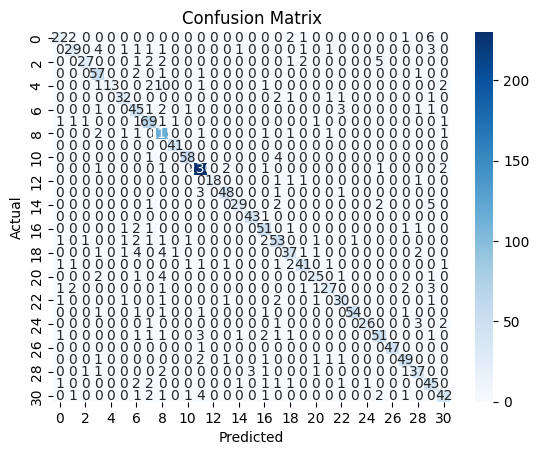

ROC Curve hanya berlaku untuk binary classification.


In [ ]:
# 2. Data Augmentation & Preprocessing
import os

image_size = (128, 128)
batch_size = 32

base_dir = '/content/drive/MyDrive/FishImgDataset'
train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'val')
test_dir  = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# 3. CNN Model Architecture dengan L2 Regularization
from tensorflow.keras import regularizers

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3), kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')
])

# 4. Compile dengan Learning Rate Scheduler
initial_lr = 0.001
lr_schedule = callbacks.LearningRateScheduler(lambda epoch: initial_lr * (0.95 ** epoch))

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=initial_lr),
    metrics=['accuracy']
)

# 5. Callbacks
early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# 6. Training
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[early_stop, lr_schedule]
)

# 7. Evaluation
test_data.reset()
pred = model.predict(test_data)
pred_labels = np.argmax(pred, axis=1)
true_labels = test_data.classes

print("\nClassification Report:")
print(classification_report(true_labels, pred_labels))

print("\nConfusion Matrix:")
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8. ROC & AUC
if train_data.num_classes == 2:
    auc = roc_auc_score(true_labels, pred[:,1])
    fpr, tpr, _ = roc_curve(true_labels, pred[:,1])
    plt.plot(fpr, tpr)
    plt.title(f"ROC Curve (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()
    plt.show()
else:
    print("ROC Curve hanya berlaku untuk binary classification.")


## 📌 Evaluasi: Pemilihan Metrik Terbaik

### 🔍 Penjelasan Metrik

| **Metrik**   | **Fungsi** |
|-------------|------------|
| **Accuracy** | Mengukur proporsi prediksi yang benar dari seluruh prediksi |
| **Precision** | Menilai seberapa tepat model memprediksi kelas positif |
| **Recall** | Menilai seberapa baik model menangkap semua sampel aktual dari kelas positif |
| **F1-Score** | Rata-rata harmonik dari Precision dan Recall |
| **AUC-ROC** | Mengukur kemampuan klasifikasi antara dua kelas |

---

### 🧠 Pemilihan Metrik Terbaik

Berdasarkan hasil klasifikasi dan karakteristik dataset, metrik terbaik untuk mengevaluasi model CNN dalam tugas ini adalah **F1-Score Makro**. Alasan utamanya:

- Dataset terdiri dari **31 kelas (multi-class)** dan relatif **seimbang** jumlah datanya.
- **F1-Score Makro** menghitung performa rata-rata dari semua kelas tanpa dipengaruhi ukuran kelas, sehingga memberikan penilaian yang adil.
- Hasil menunjukkan **macro F1-score = 0.82**, artinya model cukup baik dalam menangkap dan mengklasifikasikan kelas secara merata.
- **Accuracy = 0.85** memang tinggi, namun tidak cukup mewakili performa tiap kelas jika digunakan sendiri.
- **AUC-ROC tidak digunakan**, karena ini bukan kasus binary classification.
- **Confusion Matrix** juga digunakan untuk memvisualisasikan kesalahan prediksi antar kelas, dan hasilnya menunjukkan prediksi dominan berada di diagonal (prediksi benar).

---

### ✅ Kesimpulan

> Dengan mempertimbangkan bahwa dataset bersifat multi-kelas dan seimbang, **F1-Score makro adalah metrik terbaik** untuk mengevaluasi performa model CNN dalam tugas ini.
